[Versión interactiva](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2Fjuandadamo%2Fclases_fiuba/HEAD?filepath=6731%2Fintercambiadores.ipynb)

In [1]:
!pip install ht numpy matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pdfminer-six -VERSION- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pdfminer-six or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [36]:
# Definimos el tipo de documento, "matplotlib notebook"
# Importamos las librerías necesarias: numpy para los cálculos, 
# matplotlib para los gráficos.
# como la función erfc no está incluida en numpy, debe importarse desde otra librería
#%matplotlib notebook
%matplotlib inline
import ht as ht
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from IPython.display import Latex
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14;
mpl.rcParams['ytick.labelsize'] = 14;
mpl.rcParams['font.family'] = 'serif';

In [37]:
def deltaTx(x,Tc0,Tf0,UA,L,Cc,Cf):
    return (Tc0-Tf0)*np.exp(-UA*(1/Cc-1/Cf)*x/L)

# $$\left(T_{C0}-T_{f0}\right)~~ e^{-UA\frac{x}{L}\left(\frac{1}{C_c}-\frac{1}{C_f}\right)}$$

In [38]:
#Intercambiador Contracorriente

Tfe = 5
Tcs = 30
Tce = 90

L = 10
xi = np.linspace(0,L,100)
Cc,Cf = (100.,300)

Qc = Cc*(Tce-Tcs)
Qf = Qc

Tfs = Tfe+Qf/Cf


C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax
epsilon

0.7058823529411765

In [40]:
ht.NTU_from_effectiveness(epsilon,Cr,  subtype='parallel')

2.124910008042162

In [43]:
UA 

143.32671675411547

In [44]:
Nut = ht.NTU_from_effectiveness(epsilon, Cr, subtype='counterflow')

UA = C1 * Nut

Tcx = np.copy(xi)  #funcion de temperaturas a lo largo de x
Tcx[0] = Tce

for i, xii in enumerate(xi[:-2]):
    Tcx[i + 1] = Tcx[0] + np.trapz(
        -UA / Cc / L * deltaTx(xi[:i + 1], Tce, Tfs, UA, L, Cc, Cf),
        xi[:i + 1])
Tcx[-1] = Tcs

Tfx = np.copy(xi)
Tfx[0] = Tfs
for i, xii in enumerate(xi[:-2]):
    Tfx[i + 1] = Tfx[0] + np.trapz(
        -UA / Cf / L * deltaTx(xi[:i + 1], Tce, Tfs, UA, L, Cc, Cf),
        xi[:i + 1])
Tfx[-1] = Tfe

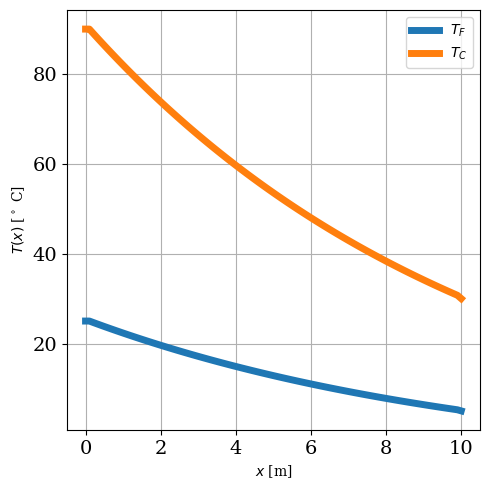

In [45]:
fig0, ax0 = plt.subplots(figsize=(5, 5))

ax0.plot(xi, Tfx, label='$T_F$', linewidth=5)
ax0.plot(xi, Tcx, label='$T_C$', linewidth=5)

ax0.set_xlabel('$x$ [m]')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [46]:
#Intercambiador Casco y Tubos

Tfe = 25
Tcs = 30
Tce = 61

Cc,Cf = (100.,10300)

Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf


C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax
Nut = ht.NTU_from_effectiveness(epsilon, Cr, subtype='1S&T')

display(Latex(f'$\\varepsilon={epsilon:.2f}$'))
display(Latex(f'$Nut={Nut:.2f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [47]:

UA = C1 * Nut

Tcx = np.copy(xi)
Tcx[0] = Tce
for i, xii in enumerate(xi[:-2]):
    Tcx[i + 1] = Tcx[0] + np.trapz(
        -UA / Cc / L * deltaTx(xi[:i + 1], Tce, Tfs, UA, L, Cc, Cf),
        xi[:i + 1])
Tcx[-1] = Tcs

Tfx = np.copy(xi)
Tfx[0] = Tfs
for i, xii in enumerate(xi[:-2]):
    Tfx[i + 1] = Tfx[0] + np.trapz(
        -UA / Cf / L * deltaTx(xi[:i + 1], Tce, Tfs, UA, L, Cc, Cf),
        xi[:i + 1])
Tfx[-1] = Tfe

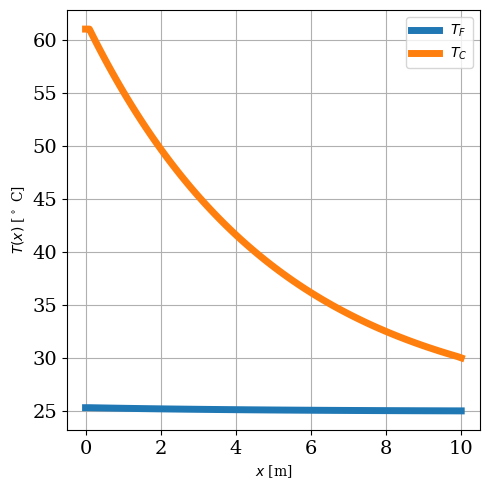

In [48]:
fig0, ax0 = plt.subplots(figsize=(5, 5))

ax0.plot(xi, Tfx, label='$T_F$', linewidth=5)
ax0.plot(xi, Tcx, label='$T_C$', linewidth=5)

ax0.set_xlabel('$x$ [m]')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()